<pre>
<img align="center" width="1000" src="https://raw.githubusercontent.com/andrelmfsantos/FIAP_2TDCPR_IA_MACHINE_LEARNING/main/images/fiap_header_google_colab.png">
</pre>

> * __Disciplina: Artificial Intelligence & Machine Learning__
* Prof. Ph.D. André Luis M.F. dos Santos:
  * [Linkedin](https://www.linkedin.com/in/andrelmfsantos/)
  * [Currículo Lattes](http://lattes.cnpq.br/1030756025619809)
  * [Google Citation](https://scholar.google.com/citations?user=2cj-0AUAAAAJ)
  * [ResearchGate](https://www.researchgate.net/profile/Andre-Luis-Marques-Ferreira-Dos-Santos)

# Sobre esse Notebook

Script para um modelo de Machine Learning que vai predizer o **`status`** das URLs (legítimo ou phishing) com base nas outras colunas. Vamos usar um **classificador baseado em árvore de decisão** com a biblioteca `scikit-learn` e fazer um pré-processamento básico dos dados.

### Etapas:
1. Carregar e processar os dados.
2. Dividir os dados em conjunto de treino, teste; e validação.
3. Treinar um modelo de árvore de decisão.
4. Avaliar o modelo.
5. Validar o modelo com novo conjunto de dados.

### Explicação:

1. **Carregar os dados**: O dataset é carregado de um arquivo CSV.
2. **Pré-processamento**: A coluna `url` é removida porque ela não é diretamente útil para o modelo.
3. **Divisão dos dados**: A base de dados é dividida em duas partes, uma para teste e treino; e outra para validação. Os dados para ajuste do modelo são divididos em 80% para treino e 20% para teste.
4. **Treinamento do modelo**: Um modelo de [árvore de decisão](https://scikit-learn.org/1.5/modules/tree.html) é treinado para prever o status (`legítimo` ou `phishing`) com base nas características das URLs.
5. **Avaliação**: O modelo é avaliado com a métrica de acurácia e um relatório de classificação que mostra as métricas de precisão, recall e f1-score.

### Requisitos:

- `pandas`: para manipulação de dados.
- `scikit-learn`: para o modelo de árvore de decisão e pré-processamento.

Instale as dependências necessárias executando:
```bash
pip install pandas scikit-learn
```

Obs.: outros algoritmos mais avançados (como Random Forest ou Gradient Boosting) podem ser testados para melhorar o desempenho.

# Features

Dicionário de variáveis (Features):

1. **`url`**: A URL completa do site em questão.

2. **`domain_in_brand`**: Indica se o domínio (ex.: `example.com`) contém o nome da marca ou uma parte dela. Isso pode ser útil para verificar se o domínio está relacionado diretamente à marca.

3. **`brand_in_subdomain`**: Indica se o nome da marca está no subdomínio do site (ex.: `marca.example.com`), o que pode sugerir uma relação ou uso específico dentro da estrutura do site.

4. **`domain_in_title`**: Indica se o nome do domínio aparece no título da página web (tag `<title>`). Essa verificação pode ser útil para garantir que o domínio tenha relevância no conteúdo da página.

5. **`domain_with_copyright`**: Indica se o domínio está associado a uma marca registrada ou tem direitos autorais indicados no site, o que é um sinal de autenticidade.

6. **`whois_registered_domain`**: O nome da entidade ou indivíduo que registrou o domínio, conforme disponível na base de dados WHOIS, que contém informações de registro de domínio.

7. **`domain_registration_length`**: A duração do período de registro do domínio (por exemplo, se foi registrado por 1, 5 ou 10 anos), o que pode indicar um compromisso de longo prazo com o domínio.

8. **`domain_age`**: A idade do domínio desde o seu registro, geralmente em anos, o que pode ser um indicador da confiabilidade e estabilidade do site.

9. **`status`**: Se a url é legitima (legitimate) ou se representa um ataque (phishing).

# Dataset

In [1]:
import pandas as pd

# URL of the CSV file
url = "https://raw.githubusercontent.com/andrelmfsantos/FIAP_2TDCPR_IA_MACHINE_LEARNING/refs/heads/main/datasets/phishing_domain.csv"

# Load the CSV file into a DataFrame
dados = pd.read_csv(url)

# Display the first few rows of the DataFrame to verify
dados.head(10)

,url,domain_in_brand,brand_in_subdomain,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,status
0,https://www.rga.com/about/workplace,0,0,1,1,0,3571,11039,legitimate
1,http://starasia.com.hk,0,0,1,1,0,0,-1,legitimate
2,https://www.youtube.com/watch?v=XszqITK-UEw,1,0,0,1,0,208,5636,legitimate
3,http://www.civico1845.com/,0,0,1,0,0,983,1938,legitimate
4,http://rapidpaws.com/wp-content/we_transfer/in...,0,0,1,0,0,338,1853,phishing
5,https://mykoreankitchen.com/dak-galbi/,0,0,1,1,0,49,-1,legitimate
6,http://support-appleld.com.secureupdate.duilaw...,0,0,1,1,0,25,3992,phishing
7,http://quiluc.com.vn,0,0,1,0,1,0,-1,legitimate
8,http://www.astro.com/astrology/tma_article1607...,0,0,0,1,0,1308,8554,legitimate
9,https://huggybearheadcanon.tumblr.com/#_=_,1,0,1,0,0,1048,5160,legitimate


In [2]:
# Características das variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   url                         2000 non-null   object
 1   domain_in_brand             2000 non-null   int64 
 2   brand_in_subdomain          2000 non-null   int64 
 3   domain_in_title             2000 non-null   int64 
 4   domain_with_copyright       2000 non-null   int64 
 5   whois_registered_domain     2000 non-null   int64 
 6   domain_registration_length  2000 non-null   int64 
 7   domain_age                  2000 non-null   int64 
 8   status                      2000 non-null   object
dtypes: int64(7), object(2)
memory usage: 140.8+ KB


# Preparação de Dados

In [3]:
# Verificar as categorias presentes na coluna
dados.status.unique()

array(['legitimate', 'phishing'], dtype=object)

In [4]:
# conta a frequencia que uma categoria aparece na base

dados['domain_with_copyright'].value_counts()

,count
domain_with_copyright,
0,1099
1,901


In [5]:
# Preparação dos dados
dt = dados.copy()
dt['status'] = dt['status'].map({'legitimate': 0, 'phishing': 1}) # conversão simbólico-numérico
dt = dt.drop('url', axis=1)                                       # eliminação manual de atributos
dt = dt[dt.domain_age > 0]                                        # seleção de subconjuntos
dt.head()

,domain_in_brand,brand_in_subdomain,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,status
0,0,0,1,1,0,3571,11039,0
2,1,0,0,1,0,208,5636,0
3,0,0,1,0,0,983,1938,0
4,0,0,1,0,0,338,1853,1
6,0,0,1,1,0,25,3992,1


In [6]:
# Dividir a base para treinar e testar; e validar o modelo
dt1 = dt.sample(frac=0.9, random_state=42) # base para treinar e testar o modelo
dt2 = dt.drop(dt1.index)                   # base para validar o modelo
print(len(dt), len(dt1), len(dt2))

1692 1523 169


# Modelo - Árvore de Decisão

Acurácia: 0.74
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       142
           1       0.79      0.71      0.75       163

    accuracy                           0.74       305
   macro avg       0.75      0.75      0.74       305
weighted avg       0.75      0.74      0.74       305



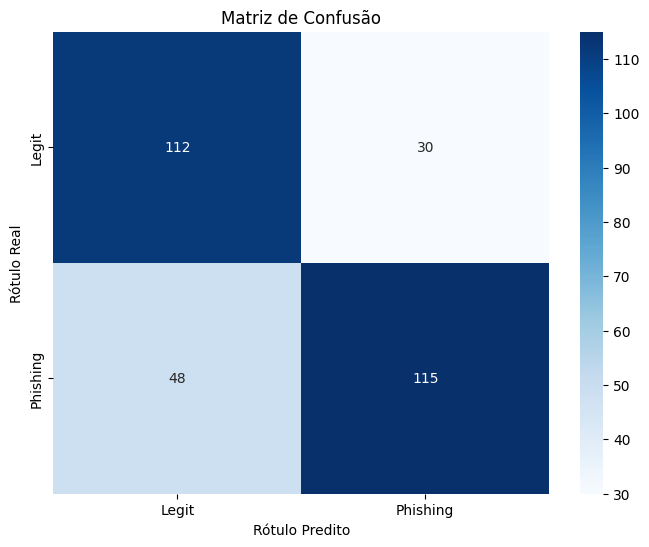

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Carregar os dados de treino
df_train = dt1.sample(frac=0.8, random_state=42)
df_test = dt1.drop(df_train.index)

# Separar recursos (X) e rótulos (y) no dataset de treino
X_train = df_train.drop(columns=['status'])  # Features
y_train = df_train['status']  # Target (coluna status)

# Separar as features (X) e o target (y) no dataset de teste
X_test = df_test.drop(columns=['status'])  # Features
y_test = df_test['status']  # Target real (coluna status)

# 5. Treinar o modelo de árvore de decisão com o dataset de treino
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 6. Fazer previsões no dataset de teste
y_pred = clf.predict(X_test)

# 7. Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

# 8. Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a Matriz de Confusão
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Predito')
plt.title('Matriz de Confusão')
plt.show()

In [8]:
# Previsão em novas amostras
#new_data = [[1, 0, 1, 1, 5, 10, 15]]  # Exemplo de novas características
new_data = dt2.copy()
new_data = new_data.drop(columns=['status'])
new_pred = clf.predict(new_data)
print(f'Previsão para nova amostra: {new_pred}')

Previsão para nova amostra: [1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0]


---

### Interpretação dos Resultados do Modelo de Classificação

| Métrica         | Valor          | Interpretação                                                                                             |
|------------------|----------------|-----------------------------------------------------------------------------------------------------------|
| **Precisão**     | **79%**     | De todas as URLs que foram previstas como phishing, 79% realmente eram phishing.                       |
| **Recall**       | **71%**     | O modelo conseguiu identificar 71% das URLs de phishing reais, capturando a maioria das ameaças.          |
| **F1-Score**     | **75%**     | A média harmônica entre precisão e recall é 75%, indicando um bom equilíbrio entre as duas métricas.  |
| **Acurácia**     | **74%**     | O modelo acertou 74% de todas as previsões feitas, indicando um desempenho geral razoável.             |

---

### Interpretação Geral

- A **precisão** sugere que há espaço para melhorar a identificação de URLs legítimas, já que um terço das previsões de phishing estava incorreto.
- O **recall** é relativamente alto, o que significa que o modelo é eficaz em detectar a maioria das URLs de phishing.
- O **F1-Score** reflete um bom equilíbrio, embora haja oportunidades para melhorar tanto a precisão quanto o recall.
- A **acurácia** mostra que, em geral, o modelo tem um desempenho aceitável, mas ainda há margem para otimização.

---

### New Predict DataFrame

In [9]:
# New Predict DataFrame
dt2a = dt2.copy()
dt2a['status_pred'] = new_pred
dt2a.sample(10, random_state = 42)

,domain_in_brand,brand_in_subdomain,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,status,status_pred
1618,0,0,1,1,0,242,7062,1,1
372,0,0,0,0,0,247,6328,0,0
1326,1,0,1,0,0,374,7295,1,1
348,0,0,0,0,0,122,7912,0,0
1693,0,0,1,0,0,212,519,1,1
1883,0,0,1,0,0,2273,3570,0,1
1938,0,0,1,0,0,140,6070,0,0
603,1,0,1,1,0,371,7298,0,0
1216,0,0,1,0,0,340,755,1,1
725,0,1,1,0,0,341,4407,1,0


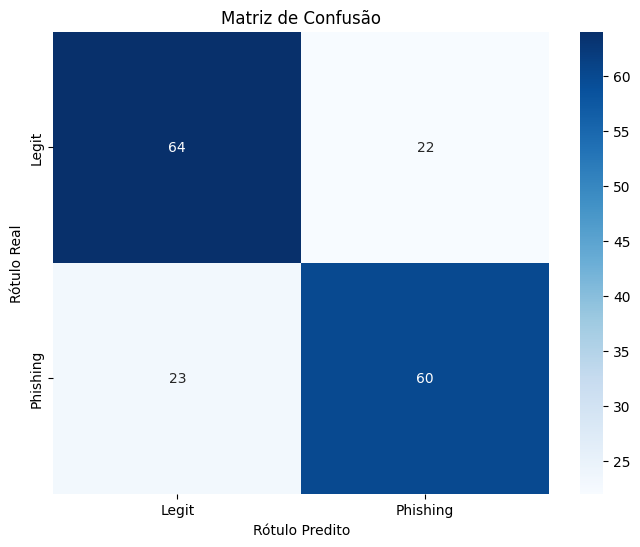

Precisão: 0.73
Recall: 0.72
F1-Score: 0.73
Acurácia: 0.73


In [10]:
# 8. Matriz de Confusão
# Importando bibliotecas necessárias
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_test1 = dt2a['status']
y_pred1 = dt2a['status_pred']

conf_matrix = confusion_matrix(y_test1, y_pred1)

# Plotando a Matriz de Confusão
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.ylabel('Rótulo Real')
plt.xlabel('Rótulo Predito')
plt.title('Matriz de Confusão')
plt.show()

# Calculando precisão, recall, F1-score e acurácia
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
accuracy = accuracy_score(y_test1, y_pred1)

#precision, recall, f1, accuracy
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Acurácia: {accuracy:.2f}')


A matriz de confusão apresentada é uma tabela que mostra as previsões feitas pelo modelo comparadas com os valores reais das classes (URLs legítimas e phishing). Vamos interpretar as quatro entradas da matriz de confusão:

|                   | **Predito: Legit** | **Predito: Phishing** |
|-------------------|:------------------:|:---------------------:|
| **Real: Legit**   | 64                | 22                   |
| **Real: Phishing**| 23                 | 60                  |

### 1. **Verdadeiros Positivos (True Positives - TP)**

- **60**: URLs que eram **realmente de phishing** e foram corretamente classificadas como phishing.
  
### 2. **Falsos Positivos (False Positives - FP)**

- **22**: URLs que eram **realmente legítimas**, mas foram incorretamente classificadas como phishing (erro do modelo).

### 3. **Falsos Negativos (False Negatives - FN)**

- **23**: URLs que eram **realmente de phishing**, mas foram incorretamente classificadas como legítimas (erro do modelo).

### 4. **Verdadeiros Negativos (True Negatives - TN)**

- **64**: URLs que eram **realmente legítimas** e foram corretamente classificadas como legítimas.

---

### **Métricas derivadas da matriz de confusão**

#### 1. **Precisão (Precision) para phishing:**
Proporção de URLs que foram classificadas como phishing e que realmente eram phishing.

\[
$\text{Precisão} = \frac{TP}{TP + FP} = \frac{60}{60 + 22} = \frac{60}{82} \approx 0.7317 \, (73.17\%)$
\]

- De todas as URLs que o modelo previu como phishing, aproximadamente **73.17%** realmente eram phishing.

#### 2. **Recall (Sensibilidade) para phishing:**
Proporção de URLs de phishing que o modelo conseguiu identificar corretamente.

\[
$\text{Recall} = \frac{TP}{TP + FN} = \frac{60}{60 + 23} = \frac{60}{83} \approx 0.7229 \, (72.29\%)$
\]

- De todas as URLs que eram realmente phishing, o modelo detectou corretamente **72.29%** delas.

#### 3. **F1-Score para phishing:**
O F1-Score é a média harmônica entre precisão e recall, e é útil para equilibrar as duas métricas.

\[
$F1 = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}} = 2 \times \frac{0.7317 \times 0.7229}{0.7317 + 0.7229} \approx 0.7273 \, (72.73\%)$
\]

- O F1-Score de **72.73%** mostra que o modelo tem um equilíbrio razoável entre precisão e recall para classificar URLs como phishing.

#### 4. **Acurácia (Accuracy):**
A proporção de previsões corretas (tanto para URLs legítimas quanto para phishing) sobre o total de previsões.

\[
$\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{60 + 64}{60 + 64 + 22 + 23} = \frac{124}{169} \approx 0.7337 \, (73.37\%)$
\]

- O modelo classifica corretamente **73.37%** de todas as URLs (tanto legítimas quanto de phishing).

---

### **Interpretação Geral**:

- O modelo tem uma **precisão de 73.17%**, o que significa que, ao prever uma URL como phishing, há uma chance de 73.17% de ele estar certo.
- O **recall de 72.29%** indica que o modelo é capaz de capturar cerca de 72% das URLs de phishing, mas deixa de identificar 27.71% delas (os falsos negativos).
- O **F1-Score** de **72.73%** mostra que há um bom equilíbrio entre precisão e recall, especialmente para detectar phishing.
- A **acurácia geral** de **73.37%** indica que o modelo está correto em aproximadamente 73% dos casos totais, mas isso deve ser interpretado com cuidado, já que a acurácia pode ser influenciada pelo balanceamento entre as classes (legítima vs phishing).

Se o foco principal for evitar falsos negativos (deixar passar URLs de phishing), aumentar o **recall** seria importante. Por outro lado, se a prioridade for evitar falsos positivos (erroneamente bloquear URLs legítimas), melhorar a **precisão** seria o foco.

# References
* [Phishing Attacks and Websites Classification Using Machine Learning and Multiple Datasets (A Comparative Analysis)](https://arxiv.org/pdf/2101.02552)
* [Web page phishing detection](https://data.mendeley.com/datasets/c2gw7fy2j4/3)
* [GitHub - FIAP_2TDCPR_IA_MACHINE_LEARNING](https://github.com/andrelmfsantos/FIAP_2TDCPR_IA_MACHINE_LEARNING/tree/main)
* [Full Dataset](https://raw.githubusercontent.com/andrelmfsantos/FIAP_2TDCPR_IA_MACHINE_LEARNING/refs/heads/main/datasets/dataset_B_05_2020.csv)
* [Decision Tree](https://scikit-learn.org/1.5/modules/tree.html)

# Apêndice 1 - Métricas de avaliação do Modelo

**Precisão (Precision)**, **Recall (Sensibilidade)** e **F1-Score** são métricas essenciais para avaliar modelos de classificação, especialmente quando as classes são desbalanceadas.

### 1. **Precisão (Precision)**

A **precisão** mede a proporção de exemplos que o modelo previu como positivos que realmente são positivos.

$\text{Precisão} = \frac{TP}{TP + FP}$

- **TP (True Positives)**: Verdadeiros positivos — previsões corretas de exemplos positivos.
- **FP (False Positives)**: Falsos positivos — exemplos incorretamente classificados como positivos.

#### Exemplo:
Imagine um modelo que classifica URLs como **phishing** ou **legítima**. Se o modelo disser que 100 URLs são phishing, mas somente 90 delas realmente são phishing (10 são legítimas), a precisão será:

${Precisão} = \frac{90}{90 + 10} = 0.9 \, (90\%)$

**Interpretação**: Quando o modelo diz que uma URL é de phishing, há 90% de chance de ele estar certo. **Alta precisão** significa poucos falsos positivos (o modelo raramente classifica URLs legítimas como phishing).

---

### 2. **Recall (Sensibilidade ou True Positive Rate)**

O **recall** mede a proporção de exemplos positivos reais que o modelo conseguiu identificar corretamente.

${Recall} = \frac{TP}{TP + FN}$

- **TP (True Positives)**: Verdadeiros positivos — previsões corretas de exemplos positivos.
- **FN (False Negatives)**: Falsos negativos — exemplos que o modelo não conseguiu identificar como positivos.

#### Exemplo:
Se o modelo está analisando 100 URLs de phishing e ele corretamente identifica 95, mas erra 5 delas (ou seja, o modelo as classificou como legítimas), o recall será:

${Recall} = \frac{95}{95 + 5} = 0.95 \, (95\%)$

**Interpretação**: O modelo foi capaz de identificar 95% de todas as URLs de phishing existentes. **Alto recall** significa poucos falsos negativos (o modelo raramente deixa de identificar uma URL de phishing).

---

### 3. **F1-Score**

O **F1-Score** é a **média harmônica** da precisão e recall. Ele é usado quando você deseja um equilíbrio entre essas duas métricas, especialmente em casos onde há um desbalanceamento entre as classes ou quando tanto os falsos positivos quanto os falsos negativos têm consequências graves.

${F1-Score} = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}}$

O **F1-Score** varia de 0 a 1, onde 1 é o valor ideal (alta precisão e recall).

#### Exemplo:
Se a precisão for 90% e o recall 95%, o F1-Score será:

$F1-Score = 2 \times \frac{0.9 \times 0.95}{0.9 + 0.95} \approx 0.926 \, (92.6\%)$

**Interpretação**: O F1-Score de 92.6% indica que o modelo é bom em equilibrar precisão e recall, capturando uma alta porcentagem de URLs de phishing (alto recall) e cometendo poucos erros ao classificar URLs legítimas como phishing (alta precisão).

---

### Quando usar cada métrica:

- **Precisão**: É importante quando o custo de um **falso positivo** é alto. Por exemplo, em uma ferramenta de detecção de phishing, se bloquear URLs legítimas causar problemas para os usuários, é crucial ter alta precisão.
  
- **Recall**: É importante quando o custo de um **falso negativo** é alto. Por exemplo, em segurança, deixar passar uma URL de phishing pode ter consequências severas, então o recall precisa ser alto para minimizar falsos negativos.

- **F1-Score**: Use quando há um **trade-off** entre precisão e recall e você precisa de um equilíbrio entre ambos. O F1-Score é uma boa métrica para avaliar o modelo em contextos de classes desbalanceadas ou quando tanto falsos positivos quanto falsos negativos são problemáticos.

### Exemplo na prática:

Se o seu modelo estiver classificando e-mails como "spam" ou "não spam":

- **Precisão alta, recall baixo**: O modelo está certo quando diz que um e-mail é spam, mas está deixando muitos e-mails de spam passarem despercebidos (baixa detecção).
  
- **Recall alto, precisão baixa**: O modelo está capturando a maioria dos e-mails de spam, mas também está erroneamente classificando muitos e-mails legítimos como spam.

- **F1-Score alto**: O modelo consegue equilibrar bem a detecção de e-mails de spam e evitar marcar e-mails legítimos como spam.

Em resumo:
- **Precisão** foca em evitar falsos positivos.
- **Recall** foca em evitar falsos negativos.
- **F1-Score** é uma média ponderada que equilibra os dois.

# Apêndice 2 - Matriz de Confusão

A matriz de confusão é uma ferramenta para avaliar o desempenho de um modelo de classificação. A matriz de confusão fornece uma visão sobre onde o modelo está acertando e onde ainda há espaço para melhorias, especialmente em sistemas críticos como detecção de phishing.

### Estrutura da Matriz de Confusão:

Suponha que a matriz de confusão gerada pelo código tenha a seguinte aparência:

|                   | **Predito: Legit** | **Predito: Phishing** |
|-------------------|:------------------:|:---------------------:|
| **Real: Legit**   | 90                 | 10                    |
| **Real: Phishing**| 5                  | 95                    |

- **Eixo Y (vertical)**: Representa os rótulos **reais** (o valor verdadeiro ou "ground truth").
- **Eixo X (horizontal)**: Representa os rótulos **preditos** pelo modelo.

### Elementos da matriz:

1. **True Positives (Verdadeiros Positivos, TP)**:
   - Valor: **95**
   - Interpretação: O modelo corretamente previu **95** URLs de **phishing** que eram, de fato, phishing.
   
2. **True Negatives (Verdadeiros Negativos, TN)**:
   - Valor: **90**
   - Interpretação: O modelo corretamente previu **90** URLs legítimas como sendo legítimas.
   
3. **False Positives (Falsos Positivos, FP)**: (também conhecido como **Erro Tipo I**)
   - Valor: **10**
   - Interpretação: O modelo previu **10** URLs como **phishing**, mas na realidade, elas eram legítimas.
   - Esse tipo de erro é problemático em sistemas de detecção de fraude, pois poderia causar bloqueios de URLs que são seguras.
   
4. **False Negatives (Falsos Negativos, FN)**: (também conhecido como **Erro Tipo II**)
   - Valor: **5**
   - Interpretação: O modelo previu **5** URLs como **legítimas**, mas na realidade, elas eram phishing.
   - Esse tipo de erro é especialmente crítico, pois significa que URLs de phishing passaram pelo sistema de segurança sem serem detectadas.

### Métricas derivadas da Matriz de Confusão:

Com base nos valores da matriz de confusão, podemos calcular algumas métricas importantes:

1. **Acurácia**

2. **Precisão (Precision)**

3. **Recall**

4. **F1-Score**

### Conclusão:

- **Pontos fortes**:
  - O modelo tem **alta acurácia (92.5%)** e **alta sensibilidade (95%)**, o que significa que ele identifica a maioria das URLs de phishing corretamente.
  - A **precisão** também é forte (90.4%), sugerindo que o modelo não classifica muitas URLs legítimas como phishing (poucos falsos positivos).

- **Pontos fracos**:
  - Há **10 falsos positivos**, ou seja, URLs legítimas classificadas como phishing. Dependendo do caso de uso, isso pode ser uma preocupação (por exemplo, bloqueio indevido de URLs seguras).
  - Existem **5 falsos negativos**, o que significa que algumas URLs de phishing passaram despercebidas, o que é crítico em contextos de segurança.

### Ajustes possíveis:
- Para reduzir **falsos negativos** (URLs de phishing não detectadas), pode ser útil ajustar a sensibilidade do modelo.
- Se **falsos positivos** forem problemáticos (muitas URLs legítimas sendo bloqueadas), um ajuste de precisão pode ser necessário, possivelmente ajustando o limiar de decisão do modelo.